# question 2



In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import os
from google.colab import drive
import copy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
#mean and std of class1
mu_x, sigma_x = 0, 0.1
mu_y, sigma_y = 0, 0.4

#generate class1 data
s_0 = np.random.normal(mu_x, sigma_x, 100)
s_1 = np.random.normal(mu_y, sigma_y, 100)
s = np.column_stack((s_0, s_1))

#class1 label
y = (np.zeros(100)-1).astype(int)

#mean and std of class1
mu_x_, sigma_x_ = 1, 0.2
mu_y_, sigma_y_ = 1, 0.2

#generate class1 data
s_0_ = np.random.normal(mu_x_, sigma_x_, 100)
s_1_ = np.random.normal(mu_y_, sigma_y_, 100)
s_ = np.column_stack((s_0_, s_1_))

#class1 label
y_ = (np.zeros(100)+1).astype(int)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


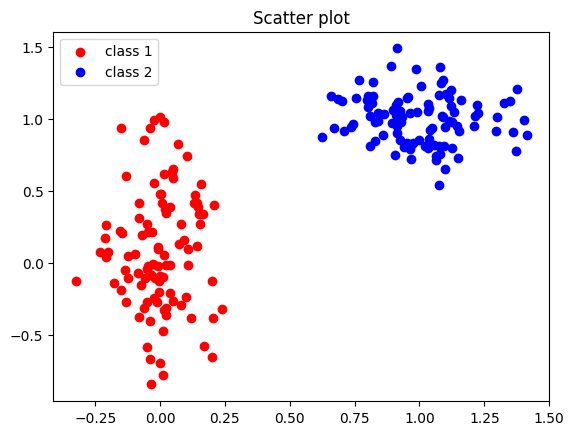

In [4]:
#plot class1 and class2 data
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(s[:,0], s[:,1], c='r', marker="o")
ax1.scatter(s_[:,0],s_[:,1], c='b', marker="o")
ax1.set(title='Scatter plot')
ax1.legend(['class 1', 'class 2'], loc='upper left')
plt.show()

In [5]:
#class adaline
class Adaline:
    def __init__(self, learning_rate = 0.01, n_iter = 50):
        self.learning_rate = learning_rate    #learning rate
        self.n_iter = n_iter                   #iteration

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])     #weights
        self.cost_ = []                        #cost

        for i in range(self.n_iter):
            output = self.net_input(X)         #adaline output
            errors = (y - output)              #error function
            self.w_[1:] += self.learning_rate * X.T.dot(errors)
            self.w_[0] += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2.0           #cost function
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        #define adaline output formula
        return np.dot(X, self.w_[1:]) + self.w_[0]
    # define activation function
    def activation(self, X):

        return self.net_input(X)
    #define adaline network prediction
    def predict(self, X):

        return np.where(self.activation(X) >= 0.0, 1, -1)

In [6]:
#concatenate class1 and class2 inputs
X_train = np.concatenate((s, s_), axis=0)
#concatenate class1 and class2 outputs
y_train = np.concatenate((y, y_), axis=0)

In [7]:

""" Function to color the deciosion regions """

def plot_decision_regions(X, y, classifier, resolution = 0.02):


    markers = ('s', 'x', 'o', '^', 'v')
    colors = ( 'cyan','green', 'gray', 'red', 'blue')
    cmap = ListedColormap(colors[ : len(np.unique(y))])

    # plot the decision surface

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
            alpha = 0.8, c = cmap(idx), marker = markers[idx],
            label = cl)

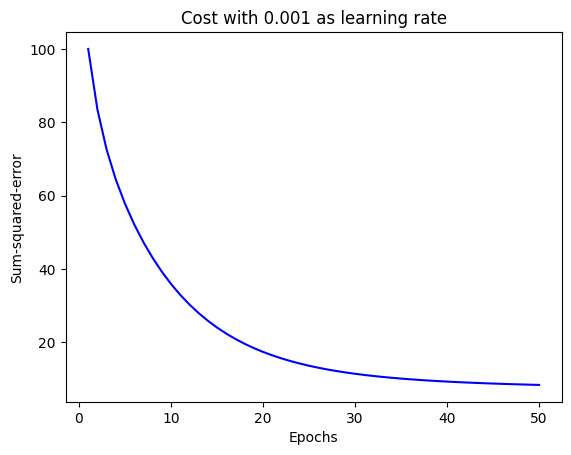

In [8]:
learning_rate = 0.001    #learning rate

#define adaline
adaline = Adaline(n_iter = 50, learning_rate=learning_rate)

#fit adaline model on x_train and y_train
adaline.fit(X_train, y_train)

#plot cost of adaline model
plt.plot(range(1, len(adaline.cost_) + 1), adaline.cost_, color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title(f'Cost with {learning_rate} as learning rate')
plt.show()


In [9]:
#print adaline model weights
pd.DataFrame(data = adaline.w_)

,0
0,-0.901127
1,1.164945
2,0.623537


<ipython-input-7-c21c6d9f2a77>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],


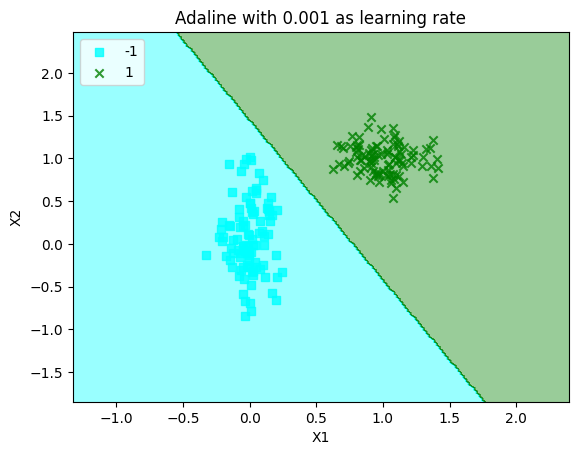

In [10]:
#plot line with adaline weights
plot_decision_regions(X_train, y_train, classifier = adaline)
plt.title(f'Adaline with {learning_rate} as learning rate')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()


In [11]:
#mean and std of class1
mu_x_2, sigma_x_2 = 0, 0.4
mu_y_2, sigma_y_2 = 0, 0.4

#generate class1 data
s_0_2 = np.random.normal(mu_x_2, sigma_x_2, 100)
s_1_2 = np.random.normal(mu_y_2, sigma_y_2, 100)
s_2 = np.column_stack((s_0_2, s_0_2))
#class1 label
y_2 = (np.zeros(100)-1).astype(int)

#mean and std of class2
mu_x_2_, sigma_x_2_ = 1, 0.3
mu_y_2_, sigma_y_2_ = 1, 0.3
#generate class2 data
s_0_2_ = np.random.normal(mu_x_2_, sigma_x_2_, 100)
s_1_2_ = np.random.normal(mu_y_2_, sigma_y_2_, 100)
s_2_ = np.column_stack((s_0_2_, s_1_2_))
#class2 label
y_2_ = (np.zeros(100)+1).astype(int)

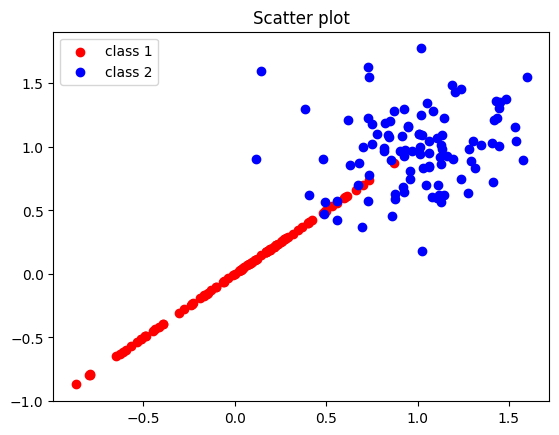

In [12]:
#plot class1 and class2 data
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(s_2[:,0], s_2[:,1], c='r', marker="o")
ax1.scatter(s_2_[:,0],s_2_[:,1], c='b', marker="o")
ax1.set(title='Scatter plot')
ax1.legend(['class 1', 'class 2'], loc='upper left')
plt.show()

In [13]:
#concatenate class1 and class2 inputs
X_train_2 = np.concatenate((s_2, s_2_), axis=0)
#concatenate class1 and class2 outputs
y_train_2 = np.concatenate((y_2, y_2_), axis=0)

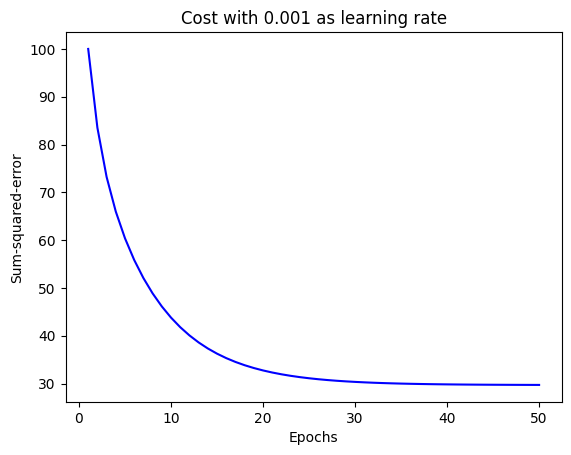

In [14]:
learning_rate = 0.001   #learning rate for update weights
#define adaline model
adaline_2 = Adaline(n_iter = 50, learning_rate=learning_rate)

#fit the model on the x_train and y_train
adaline_2.fit(X_train_2, y_train_2)

##plot cost of adaline model
plt.plot(range(1, len(adaline_2.cost_) + 1), adaline_2.cost_, color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title(f'Cost with {learning_rate} as learning rate')
plt.show()


In [15]:
#print adaline weights
pd.DataFrame(data = adaline_2.w_)

,0
0,-0.713798
1,0.728261
2,0.701778


<ipython-input-7-c21c6d9f2a77>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],


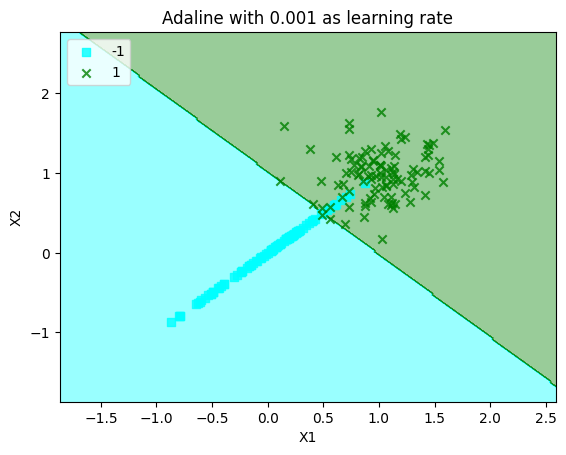

In [16]:
#plot line with adaline weights
plot_decision_regions(X_train_2, y_train_2, classifier = adaline_2)
plt.title(f'Adaline with {learning_rate} as learning rate')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()


**Madaline**

In [5]:
#read dataset file
columnNames = ['a','b','c']
df = pd.read_csv("/content/drive/MyDrive/NNDL_HW1/Q2_Dataset/MadaLine.csv",header= None,names=columnNames)

In [6]:
#print dataset
df.head()

,a,b,c
0,-0.642823,0.720606,0.0
1,-0.218126,0.677263,0.0
2,-0.582930,-0.347496,0.0
3,0.285127,0.091750,0.0
4,-0.335577,-0.313893,0.0


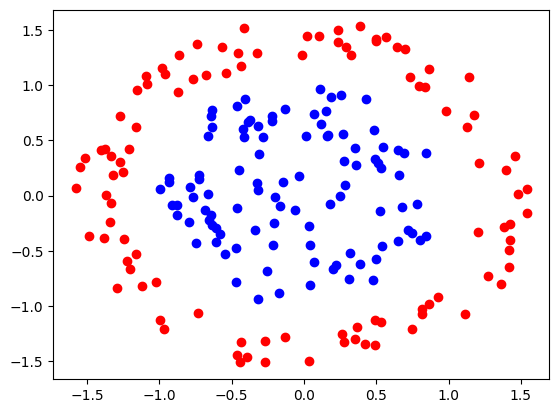

In [7]:
#plot train data with label

fig = plt.figure()
ax1 = fig.add_subplot(111)
dist_1 = df[df['c'] == 0.0]
dist_2 = df[df['c'] == 1.0]

#plot with scatter plot
ax1.scatter(dist_1.loc[:,'a'], dist_1.loc[:,'b'], c='b', marker="o")
ax1.scatter(dist_2.loc[:,'a'],dist_2.loc[:,'b'], c='r', marker="o")
plt.show()

In [9]:
#class madaline
class Madaline:
    def __init__(self, num_l, n_iter=500, learning_rate=0.1):
        self.n_iter = n_iter   #iteration
        self.learning_rate = learning_rate     #learning rate of update weights

        #initial weights for madaline model
        np.random.seed(40)
        self.weights = np.random.rand(num_l, 2)
        self.v = [1] * num_l
        self.b = np.random.rand(num_l, 1)
        self.b2 = num_l - 1

    #define fit function of madaline model
    def fit(self, X, Y):
        count = 0
        self.cost_ = []   #define cost list
        for iter in range(self.n_iter):
            old_weights = copy.deepcopy(self.weights)
            for x, label in zip(X, Y):
                z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b   #output of neurons
                z = np.heaviside(z_in, 1) * 2 - 1
                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y = np.heaviside(y_in, 1) * 2 - 1
                if y != label:
                    if label == 1:
                        z_j = max(z_in)
                        ind = np.where(z_in == z_j)
                        self.weights[ind, :] = self.weights[ind, :] + self.learning_rate * (1 - z_in[ind]) * np.array(x)  #update weights
                        self.b[ind] = self.b[ind] + self.learning_rate * (1 - z_in[ind])             #update weights
                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            self.weights[indice, :] = self.weights[indice, :] + self.learning_rate * (
                                    -1 - z_in[indice]) * np.array(x)
                            self.b[indice] = self.b[indice] + self.learning_rate * (-1 - z_in[indice])


            self.cost_.append(self.error(self.predict(X), Y))   #append error in cost list

            if np.all((self.weights - old_weights) < 0.0001) and iter > 10:
                count += 1
                if count > 10:
                    print("Total iterations with", len(self.b), "lines:", iter + 1)
                    break
    #define prediction function for madaline model
    def predict(self, X):
        y = []
        for x in X:
            z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)
        return y
    #define error function for madaline model
    def error(self, net, t):
      self.err = ((t-net)**2).sum()/2.
      return self.err


In [10]:
#split input data and output
mad_x = df.loc[:,['a','b']].to_numpy()
mad_y = df.loc[:,['c']].to_numpy().flatten().astype(int)
#change label=0 to label=-1
mad_y[mad_y == 0] = -1

In [11]:
#split train data and test dat
X_train_mad, X_test_mad, y_train_mad, y_test_mad = train_test_split(mad_x, mad_y, test_size=0.2, random_state=42)


Total iterations with 3 lines: 271
Accuracy of prediction is: 0.875


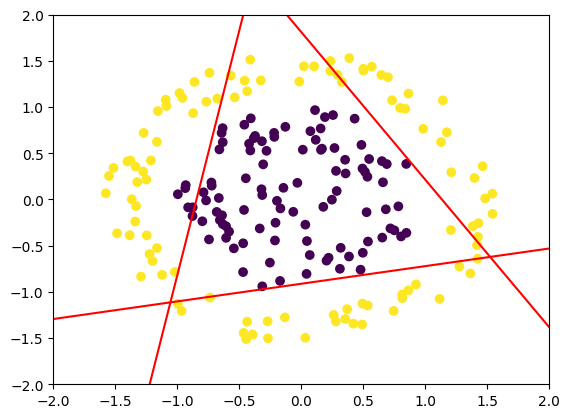

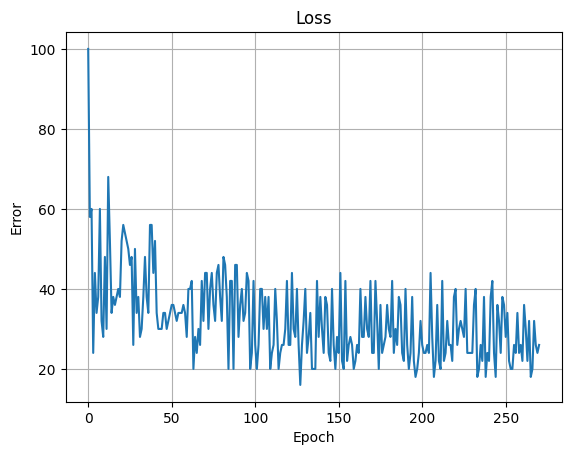

Total iterations with 4 lines: 30
Accuracy of prediction is: 0.975


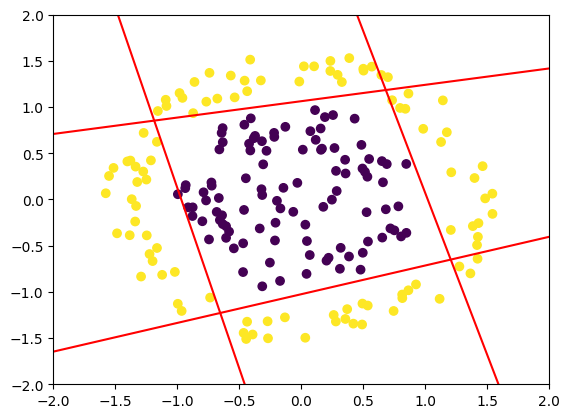

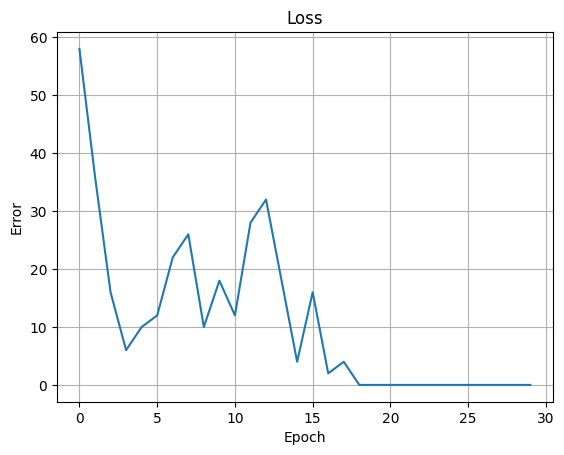

Total iterations with 10 lines: 22
Accuracy of prediction is: 0.95


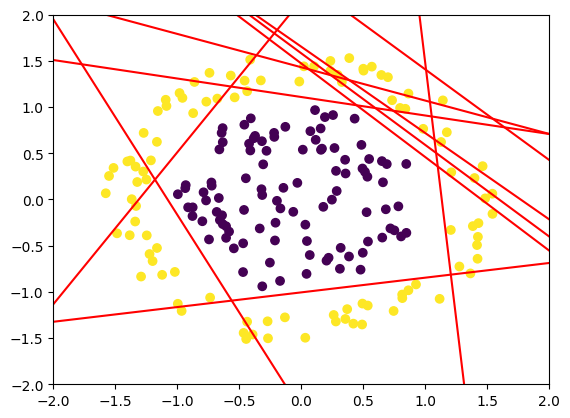

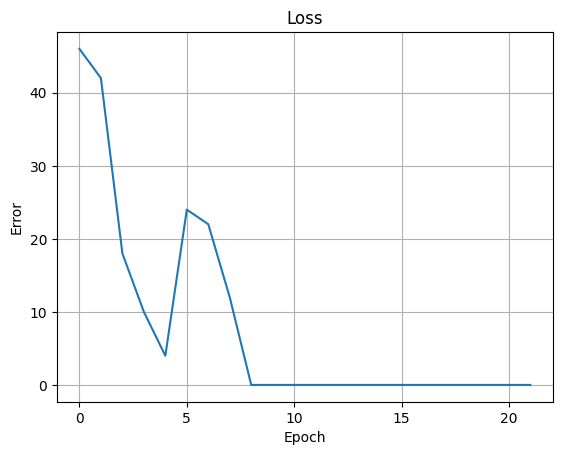

In [12]:
neuron_counts = [3,4,10]   #number of hidden layer neurons

for i in range(3):
  #define madaline with different number of hidden layer neurons
  madaline = Madaline(neuron_counts[i],learning_rate=0.1)

  #fit madaline on x_train and y_train
  madaline.fit(X_train_mad, y_train_mad)

  #predict x_test with madaline model
  pred = madaline.predict(X_test_mad)

  #madaline model accuracy
  acc = accuracy_score(pred, y_test_mad)
  print("Accuracy of prediction is:", acc)
  #plot lines and errors of madaline models
  for i in range(neuron_counts[i]):
    plt.axline((0, float(-madaline.b[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")
  plt.scatter(mad_x[:,0], mad_x[:,1], c=mad_y.reshape(-1))
  plt.xlim([-2, 2])
  plt.ylim([-2, 2])
  plt.show()

  plt.plot(madaline.cost_)
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.grid()
  plt.show()
